# 📊 Steam Games EDA

Exploratory Data Analysis on the cleaned Steam dataset.

We will use:

- `clean_data_grouped.csv` for grouped analysis (price, reviews, publishers, releases)
- `clean_data_exploded.csv` for tag-level analysis


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df = pd.read_csv('clean_data_grouped_v3.csv')
df2 = pd.read_csv('clean_data_exploded_v3.csv')

print('Grouped shape:', df.shape)
print('Exploded shape:', df2.shape)
df.head(3)

Grouped shape: (8947, 16)
Exploded shape: (130223, 14)


/var/folders/34/p366zx5n61gbpz187v7lmfw00000gn/T/ipykernel_60622/2745687097.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('clean_data_exploded_v3.csv')


,title,is_free,publisher,price,tags_list,review_percent,review_count,review_category,price_bucket,release_year,release_month,price_floor,price_ceil,review_outlier,outlier_title,price_int
0,PUBG: BATTLEGROUNDS,True,"KRAFTON, Inc.",0.0,"['Survival', 'Shooter', 'Battle Royale', 'Mult...",69.0,14380.0,Mixed,Free,2017.0,Dec,0.0,0.0,No,NaN,0.0
1,Europa Universalis V,False,Paradox Interactive,3259.0,"['Resource Management', '4X', 'Grand Strategy'...",77.0,1695.0,Positive,High,2025.0,Nov,3000.0,3500.0,No,NaN,3259.0
2,ARC Raiders,False,Embark Studios,2467.0,"['Extraction Shooter', 'PvP', 'PvE', 'Third-Pe...",90.0,30474.0,Positive,High,2025.0,Oct,2000.0,2500.0,Yes,ARC Raiders,2467.0


## 💰 Price Distribution


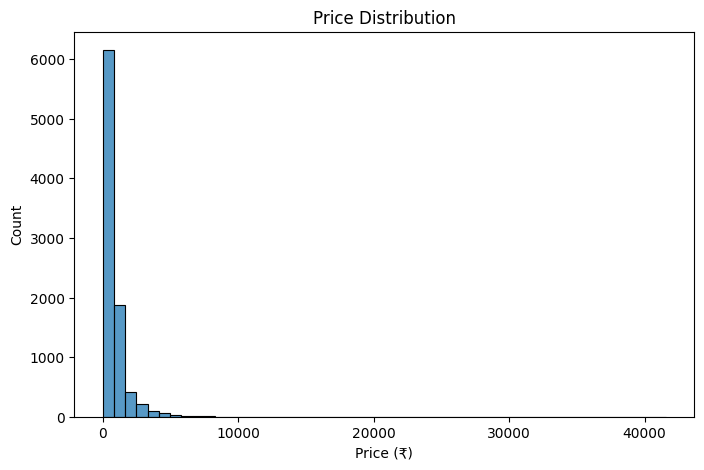

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.show()

## ⭐ Review Percent Distribution


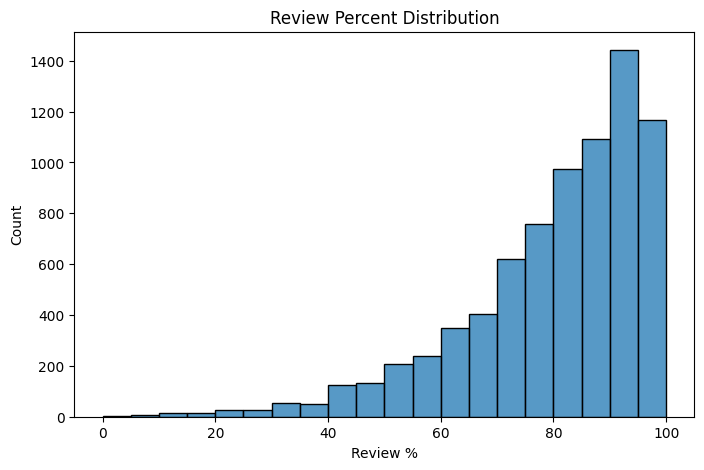

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['review_percent'], bins=20, kde=False)
plt.title('Review Percent Distribution')
plt.xlabel('Review %')
plt.ylabel('Count')
plt.show()

## 📅 Releases per Year


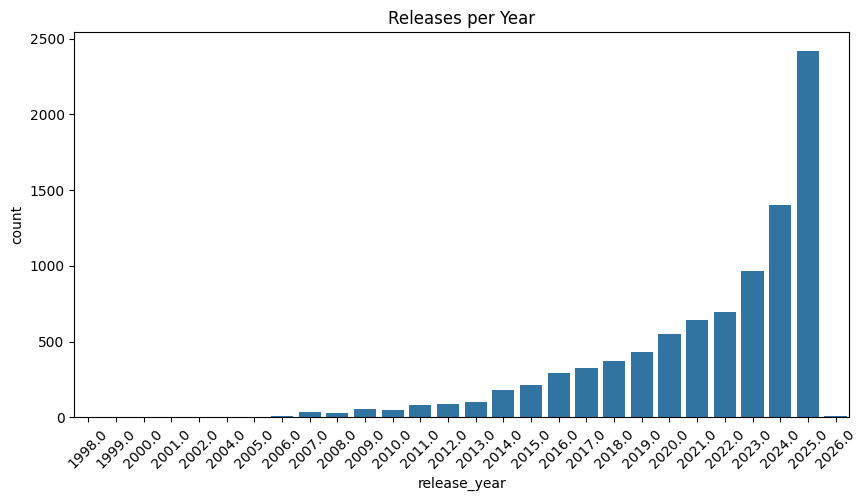

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.title('Releases per Year')
plt.xticks(rotation=45)
plt.show()

## 🏢 Top 10 Publishers by Game Count


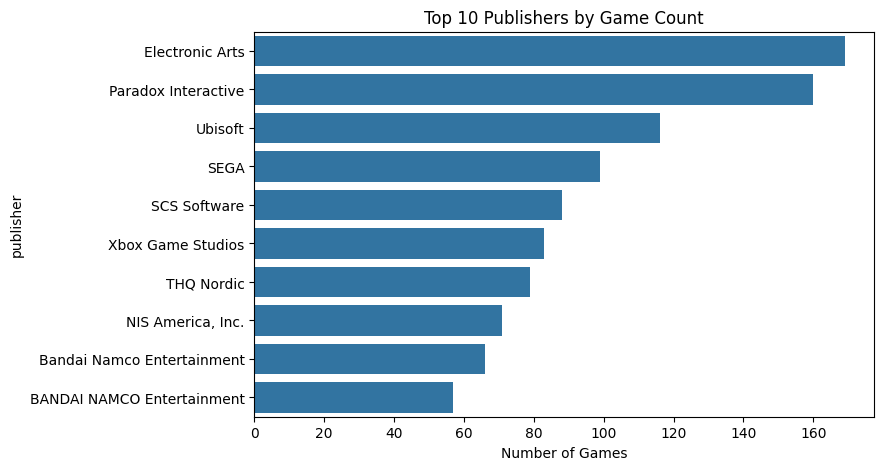

In [7]:
top_publishers = df['publisher'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Game Count')
plt.xlabel('Number of Games')
plt.show()

## 🏷️ Top 20 Tags (from exploded dataset)


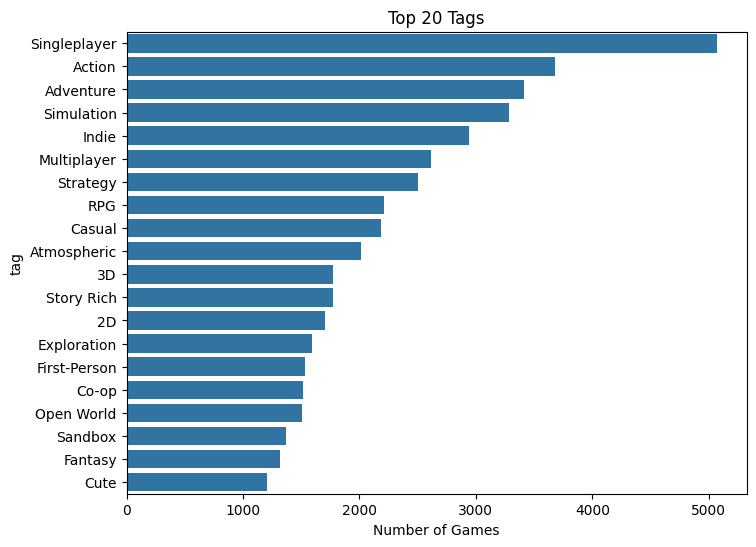

In [8]:
top_tags = df2['tag'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 20 Tags')
plt.xlabel('Number of Games')
plt.show()